In [9]:
import nltk

In [10]:
import pandas as pd
kalimat = pd.read_excel('dataku/data_fix.xlsx', error_bad_lines=False)

In [11]:
kalimat.head()

,Unnamed: 0,Unnamed: 1
0,B,"2019-10-12 01:06:45,""b'Terkait Penambahan Keam..."
1,A,"2019-10-12 01:06:23,""b'RT @KompasTV: Pada Mei ..."
2,A,"2019-10-12 01:05:41,""b""""RT @detikcom: Lima aku..."
3,C,"2019-10-12 01:02:35,""b'RT @threadreaderapp: @P..."
4,A,"2019-10-12 00:57:12,b'@Mey_MeynieJT ga tega sy..."


In [12]:
kalimat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Unnamed: 0    10000 non-null object
Unnamed: 1    10000 non-null object
dtypes: object(2)
memory usage: 156.3+ KB


In [13]:
print(type(kalimat))

<class 'pandas.core.frame.DataFrame'>


In [14]:
df = kalimat.rename(columns={"Unnamed: 0" : "Kelas", "Unnamed: 1" : "Teks"})

In [15]:
df.head()


,Kelas,Teks
0,B,"2019-10-12 01:06:45,""b'Terkait Penambahan Keam..."
1,A,"2019-10-12 01:06:23,""b'RT @KompasTV: Pada Mei ..."
2,A,"2019-10-12 01:05:41,""b""""RT @detikcom: Lima aku..."
3,C,"2019-10-12 01:02:35,""b'RT @threadreaderapp: @P..."
4,A,"2019-10-12 00:57:12,b'@Mey_MeynieJT ga tega sy..."


In [16]:
lower_case = df["Teks"] = df["Teks"].str.lower()
lower_case.head()

0    2019-10-12 01:06:45,"b'terkait penambahan keam...
1    2019-10-12 01:06:23,"b'rt @kompastv: pada mei ...
2    2019-10-12 01:05:41,"b""rt @detikcom: lima aku...
3    2019-10-12 01:02:35,"b'rt @threadreaderapp: @p...
4    2019-10-12 00:57:12,b'@mey_meyniejt ga tega sy...
Name: Teks, dtype: object

In [17]:
df.head()

,Kelas,Teks
0,B,"2019-10-12 01:06:45,""b'terkait penambahan keam..."
1,A,"2019-10-12 01:06:23,""b'rt @kompastv: pada mei ..."
2,A,"2019-10-12 01:05:41,""b""""rt @detikcom: lima aku..."
3,C,"2019-10-12 01:02:35,""b'rt @threadreaderapp: @p..."
4,A,"2019-10-12 00:57:12,b'@mey_meyniejt ga tega sy..."


In [18]:
df.Teks = df.Teks.str.replace('\d+','')
df.Teks.head()

0    -- ::,"b'terkait penambahan keamanan menteri, ...
1    -- ::,"b'rt @kompastv: pada mei lalu, kapolri ...
2    -- ::,"b""rt @detikcom: lima akun media sosial...
3    -- ::,"b'rt @threadreaderapp: @pengamatakungl ...
4    -- ::,b'@mey_meyniejt ga tega sy liat p #wiran...
Name: Teks, dtype: object

In [19]:
df.head()

,Kelas,Teks
0,B,"-- ::,""b'terkait penambahan keamanan menteri, ..."
1,A,"-- ::,""b'rt @kompastv: pada mei lalu, kapolri ..."
2,A,"-- ::,""b""""rt @detikcom: lima akun media sosial..."
3,C,"-- ::,""b'rt @threadreaderapp: @pengamatakungl ..."
4,A,"-- ::,b'@mey_meyniejt ga tega sy liat p #wiran..."


In [20]:
df.Teks = df.Teks.str.replace('@',' ')
df.head()

,Kelas,Teks
0,B,"-- ::,""b'terkait penambahan keamanan menteri, ..."
1,A,"-- ::,""b'rt kompastv: pada mei lalu, kapolri ..."
2,A,"-- ::,""b""""rt detikcom: lima akun media sosial..."
3,C,"-- ::,""b'rt threadreaderapp: pengamatakungl ..."
4,A,"-- ::,b' mey_meyniejt ga tega sy liat p #wiran..."


In [21]:
df.Teks = df.Teks.str.replace('--','')
df.head()

,Kelas,Teks
0,B,"::,""b'terkait penambahan keamanan menteri, in..."
1,A,"::,""b'rt kompastv: pada mei lalu, kapolri je..."
2,A,"::,""b""""rt detikcom: lima akun media sosial d..."
3,C,"::,""b'rt threadreaderapp: pengamatakungl sa..."
4,A,"::,b' mey_meyniejt ga tega sy liat p #wiranto..."


In [22]:
df.Teks = df.Teks.str.replace('_','')
df.head()

,Kelas,Teks
0,B,"::,""b'terkait penambahan keamanan menteri, in..."
1,A,"::,""b'rt kompastv: pada mei lalu, kapolri je..."
2,A,"::,""b""""rt detikcom: lima akun media sosial d..."
3,C,"::,""b'rt threadreaderapp: pengamatakungl sa..."
4,A,"::,b' meymeyniejt ga tega sy liat p #wirantod..."


In [23]:
df.Teks = df.Teks.str.replace('::','')
df.head()

,Kelas,Teks
0,B,",""b'terkait penambahan keamanan menteri, ini ..."
1,A,",""b'rt kompastv: pada mei lalu, kapolri jend..."
2,A,",""b""""rt detikcom: lima akun media sosial dil..."
3,C,",""b'rt threadreaderapp: pengamatakungl salu..."
4,A,",b' meymeyniejt ga tega sy liat p #wirantodit..."


In [24]:
df.Teks = df.Teks.str.replace('^ ,"b rt +|"" +$','')
df.head()

,Kelas,Teks
0,B,",""b'terkait penambahan keamanan menteri, ini ..."
1,A,",""b'rt kompastv: pada mei lalu, kapolri jend..."
2,A,",""b""""rt detikcom: lima akun media sosial dil..."
3,C,",""b'rt threadreaderapp: pengamatakungl salu..."
4,A,",b' meymeyniejt ga tega sy liat p #wirantodit..."


In [25]:
df.Teks = df.Teks.str.replace('b ','')
df.head()

,Kelas,Teks
0,B,",""b'terkait penambahan keamanan menteri, ini ..."
1,A,",""b'rt kompastv: pada mei lalu, kapolri jend..."
2,A,",""b""""rt detikcom: lima akun media sosial dil..."
3,C,",""b'rt threadreaderapp: pengamatakungl salu..."
4,A,",b' meymeyniejt ga tega sy liat p #wirantodit..."


In [26]:
df.Teks = df.Teks.str.replace('rt ','')
df.head()

,Kelas,Teks
0,B,",""b'terkait penambahan keamanan menteri, ini ..."
1,A,",""b' kompastv: pada mei lalu, kapolri jendera..."
2,A,",""b"""" detikcom: lima akun media sosial dilapo..."
3,C,",""b' threadreaderapp: pengamatakungl saluti ..."
4,A,",b' meymeyniejt ga tega sy liat p #wirantodit..."


In [27]:
df.Teks = df.Teks.str.replace('b,','')
df.head()

,Kelas,Teks
0,B,",""b'terkait penambahan keamanan menteri, ini ..."
1,A,",""b' kompastv: pada mei lalu, kapolri jendera..."
2,A,",""b"""" detikcom: lima akun media sosial dilapo..."
3,C,",""b' threadreaderapp: pengamatakungl saluti ..."
4,A,",b' meymeyniejt ga tega sy liat p #wirantodit..."


In [28]:
#Memecah colom menjadi 2 variabel terpisah

label = df.iloc[0:,0:1]
teks = df.iloc[0:,1:2]

In [29]:
df.Teks = df.Teks.str.replace('#','')
df.head()

,Kelas,Teks
0,B,",""b'terkait penambahan keamanan menteri, ini ..."
1,A,",""b' kompastv: pada mei lalu, kapolri jendera..."
2,A,",""b"""" detikcom: lima akun media sosial dilapo..."
3,C,",""b' threadreaderapp: pengamatakungl saluti ..."
4,A,",b' meymeyniejt ga tega sy liat p wirantoditu..."


In [30]:
df.Teks = df.Teks.str.replace(" : ",' ')
df.head()

,Kelas,Teks
0,B,",""b'terkait penambahan keamanan menteri, ini ..."
1,A,",""b' kompastv: pada mei lalu, kapolri jendera..."
2,A,",""b"""" detikcom: lima akun media sosial dilapo..."
3,C,",""b' threadreaderapp: pengamatakungl saluti ..."
4,A,",b' meymeyniejt ga tega sy liat p wirantoditu..."


In [31]:
df = df.replace(regex=['A'], value='Positif')
df.head()

,Kelas,Teks
0,B,",""b'terkait penambahan keamanan menteri, ini ..."
1,Positif,",""b' kompastv: pada mei lalu, kapolri jendera..."
2,Positif,",""b"""" detikcom: lima akun media sosial dilapo..."
3,C,",""b' threadreaderapp: pengamatakungl saluti ..."
4,Positif,",b' meymeyniejt ga tega sy liat p wirantoditu..."


In [32]:
df = df.replace(regex=['B'], value='Netral')
df.head()

,Kelas,Teks
0,Netral,",""b'terkait penambahan keamanan menteri, ini ..."
1,Positif,",""b' kompastv: pada mei lalu, kapolri jendera..."
2,Positif,",""b"""" detikcom: lima akun media sosial dilapo..."
3,C,",""b' threadreaderapp: pengamatakungl saluti ..."
4,Positif,",b' meymeyniejt ga tega sy liat p wirantoditu..."


In [33]:
df = df.replace(regex=['C'], value='Negatif')
df.head()

,Kelas,Teks
0,Netral,",""b'terkait penambahan keamanan menteri, ini ..."
1,Positif,",""b' kompastv: pada mei lalu, kapolri jendera..."
2,Positif,",""b"""" detikcom: lima akun media sosial dilapo..."
3,Negatif,",""b' threadreaderapp: pengamatakungl saluti ..."
4,Positif,",b' meymeyniejt ga tega sy liat p wirantoditu..."


In [36]:
import matplotlib.pyplot as plt

plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[0])

plot_size[0] = 8
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size



6.0
6.0


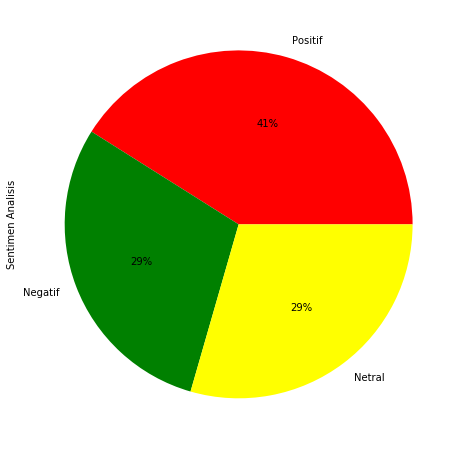

In [37]:
df.Kelas.value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%',
    label = "Sentimen Analisis",
    colors = ["red", "green", "yellow"]
    
)
plt.show()

Contoh dibawah menunjukan bagaimana python menghapus angka dalam sebuah kalimat :

In [38]:
df.isnull().sum().sum()
df.isnull().any()
df.isnull().values.any()

False

In [39]:
inds = pd.isnull(df).any(1).nonzero()[0]
inds

/home/stmik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


array([], dtype=int64)

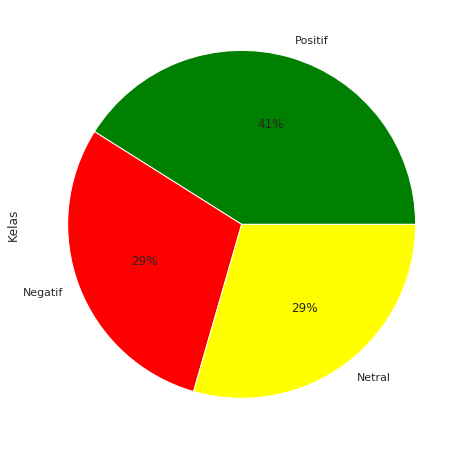

In [68]:
df.Kelas.value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%',
    colors = ["green", "red", "yellow"]
)
plt.show()

In [53]:
df.isnull().any()
df.describe()
df.isnull().sum()
df.isnull().values.any()
df.isnull().sum().sum()

0

In [54]:
features = df.iloc[:,1].values
label = df.iloc[:,0].values


In [55]:
import re
processed_features = []
for sentence in range(0, len(features)):
    #menghapus semua karakter
    processed_feature = re.sub(r'\W',' ', str(features[sentence]))
    
    #menghapus single karakter
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+',' ', processed_feature)
    
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    #menghapus multiple spasi dengan single spasi
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    
    #mengahpus prefix
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    #mengubah huruf kapital menjadi huruf kecil semua
    processed_feature = processed_feature.lower()
    
    processed_features.append(processed_feature)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    processed_features,
    label,
    test_size=0.30,
    random_state=123
)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

#Metode Klasifikasi
from sklearn import svm
clf_svm = svm.SVC(gamma='scale')

cvrc = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

In [57]:
model = Pipeline([('vectorizer', tvec),('classifier', clf_svm)])

In [58]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,

In [59]:
prediksi = model.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test, prediksi))
print(classification_report(y_test, prediksi))
print("Total Akurasi", round(accuracy_score(y_test, prediksi), 2))

              precision    recall  f1-score   support

     Negatif       0.97      0.83      0.89       867
      Netral       0.63      0.88      0.74       919
     Positif       0.89      0.72      0.79      1214

    accuracy                           0.80      3000
   macro avg       0.83      0.81      0.81      3000
weighted avg       0.83      0.80      0.80      3000

Total Akurasi 0.8


In [61]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


accuracy_svc = accuracy_score(y_test, prediksi)
recall_svc = recall_score(y_test, prediksi, average="weighted")
preccision_svc = precision_score(y_test, prediksi, average="weighted")

In [65]:
model_vis = [['Presisi', preccision_svc * 100],
              ['Recall', recall_svc * 100],
             ['Akurasi', accuracy_svc * 100],
            ]
model_frame = pd.DataFrame(model_vis, columns=["Metode Uji","%Hasil"])
round(model_frame)

,Metode Uji,%Hasil
0,Presisi,83.0
1,Recall,80.0
2,Akurasi,80.0


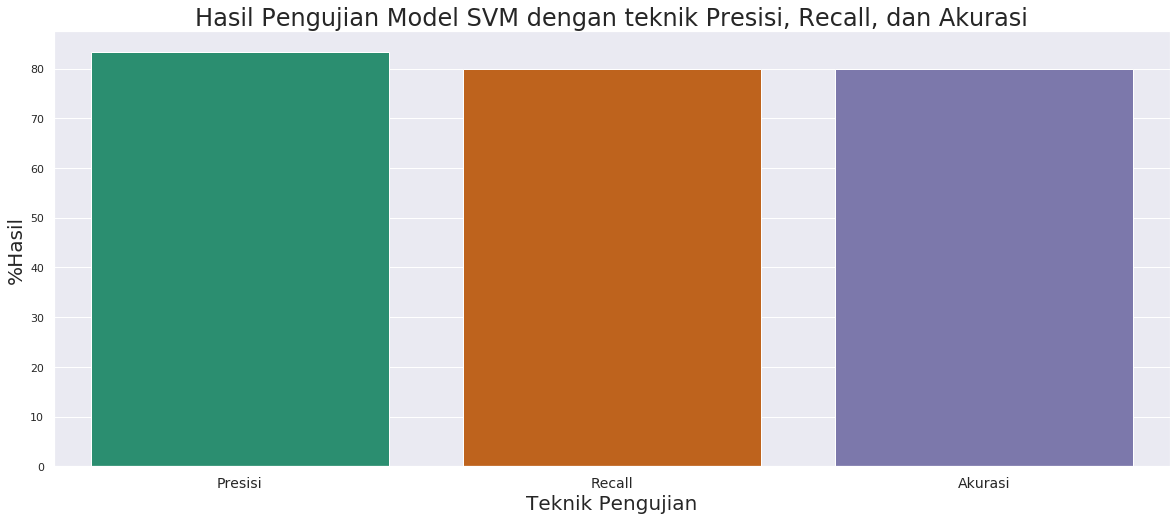

In [66]:
import seaborn as sns
fig = plt.figure(figsize=(20,8))
sns.set()
sns.barplot(x='Metode Uji',
            y='%Hasil', 
            data=model_frame,
            palette='Dark2'
           )

plt.xticks(size=14)
plt.title("Hasil Pengujian Model SVM dengan teknik Presisi, Recall, dan Akurasi", size=24)
plt.ylabel("%Hasil", size=20)

plt.xlabel("Teknik Pengujian", size=20)
plt.show()

